In [1]:
#import requests
#import bs4
#from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500) # to display 500 rows

import time
from datetime import datetime

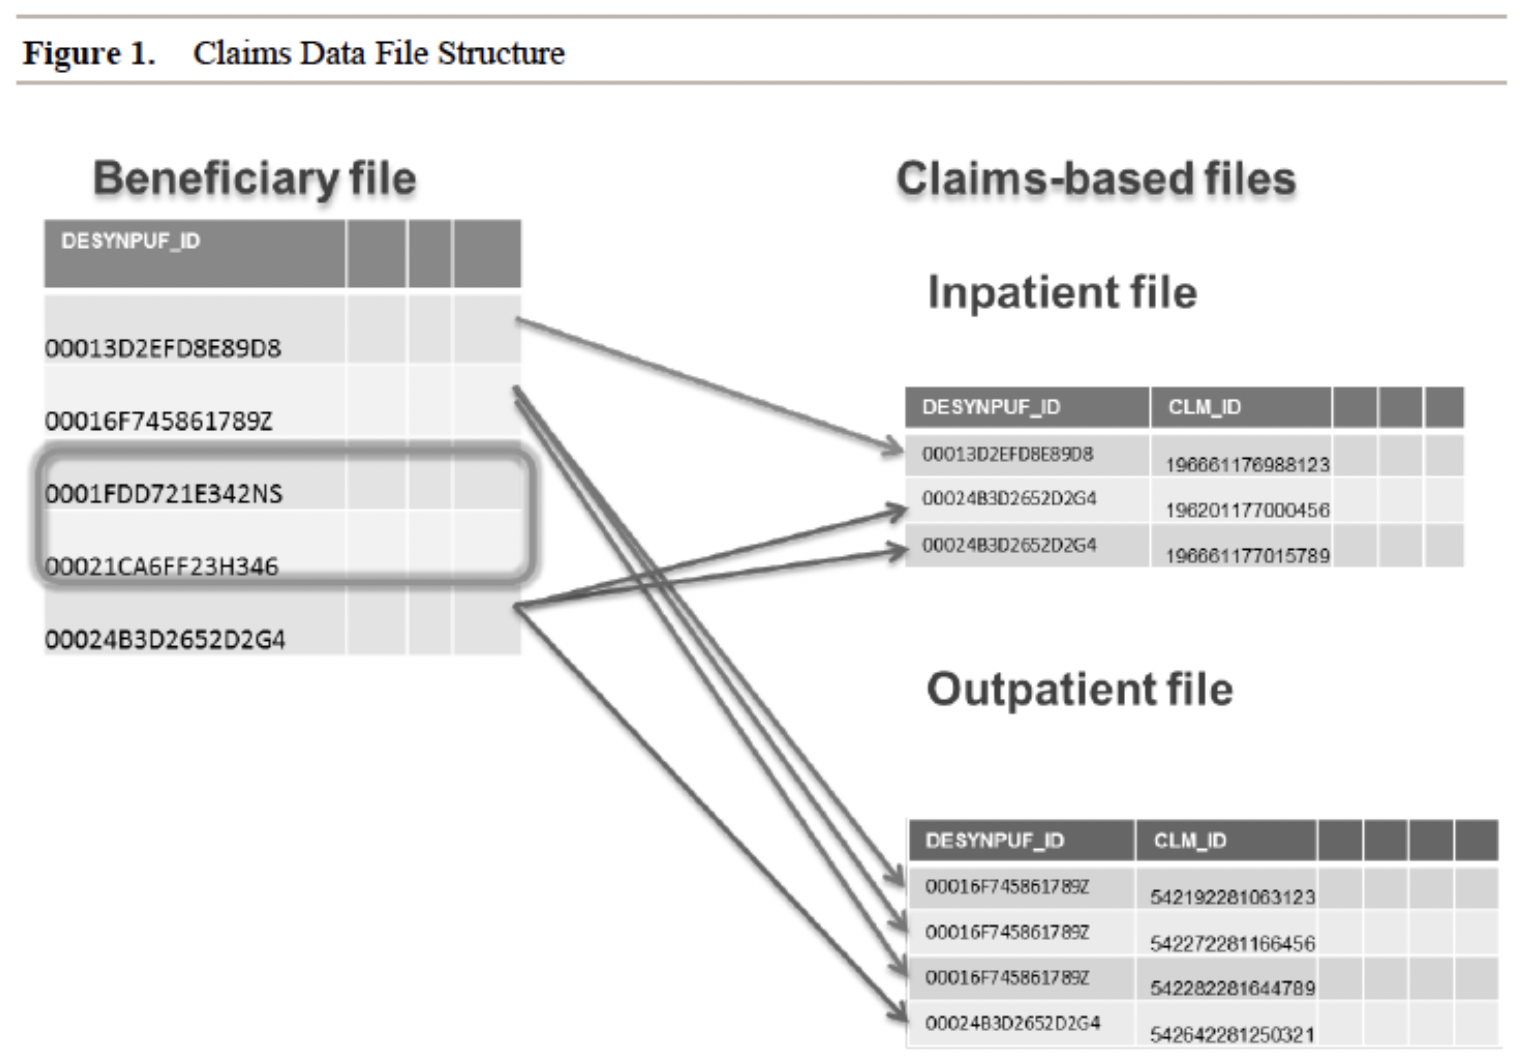

In [2]:
#![](FileStructure.png)
from IPython.display import Image
Image(filename='FileStructure.png')

In [3]:
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database =  'cms_medicare_claims'  # 'cms_claims' # 

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

In [4]:
# Check Tables in the Database
query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)

,tablename
0,icd9_diagonsis
1,icd9_procedures
2,hcpcs
3,beneficiary2008
4,beneficiary2009
5,beneficiary2010
6,inpatient_claims
7,outpatient_claims
8,prescription_drug_events


In [10]:
''' query = """
SELECT table_name, column_name, data_type, table_schema
FROM information_schema.columns
WHERE table_schema = 'public'
order by table_name
"""
pd.read_sql(query, con=conn) '''

' query = """\nSELECT table_name, column_name, data_type, table_schema\nFROM information_schema.columns\nWHERE table_schema = \'public\'\norder by table_name\n"""\npd.read_sql(query, con=conn) '

#### Function

In [5]:
def query_func(query, conn):
    df = pd.read_sql(query , con=conn)
    return df

In [6]:
q = '''SELECT * FROM beneficiary2008 '''

Beneficiary2008DF = query_func(q, conn)

print(Beneficiary2008DF.shape)
Beneficiary2008DF.head(1)

(116352, 32)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,1923-05-01,NaT,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0


In [13]:
Beneficiary2008DF.SP_ISCHMCHT.value_counts(normalize=True)  # 1 means have disease, 2 means no disease

2    0.579363
1    0.420637
Name: SP_ISCHMCHT, dtype: float64

In [7]:
q = '''SELECT * FROM beneficiary2009 '''

Beneficiary2009DF = query_func(q, conn)

print(Beneficiary2009DF.shape)
Beneficiary2009DF.head(1)

(114538, 32)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,1923-05-01,NaT,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0


In [8]:
q = '''SELECT * FROM beneficiary2010 '''

Beneficiary2010DF = query_func(q, conn)

print(Beneficiary2010DF.shape)
Beneficiary2010DF.head(2)

(112811, 32)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,1919-07-01,NaT,2,2,0,5,400,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,1936-05-01,NaT,1,1,0,11,530,12,12,0,12,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,500.0,0.0,0.0,90.0,60.0,0.0


In [16]:
# Combining Beneficiaries together

In [9]:
Beneficiaries = pd.concat([Beneficiary2008DF, Beneficiary2009DF, Beneficiary2010DF])
print(Beneficiaries.shape)
Beneficiaries.head(2)

(343701, 32)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,1923-05-01,NaT,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,1943-01-01,NaT,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0


In [10]:
q = '''SELECT * FROM icd9_diagonsis '''

ICD9_DiagonsisDF = query_func(q, conn)
print(ICD9_DiagonsisDF.shape)
ICD9_DiagonsisDF.head(2)

(14572, 3)


,diagnosis_cd,long_desc,short_desc
0,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae
1,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor


In [11]:
q = '''SELECT * FROM icd9_procedures '''

ICD9_ProcedureDF = query_func(q, conn)
print(ICD9_ProcedureDF.shape)
ICD9_ProcedureDF.head(1)

(3882, 3)


,procedure_cd,long_desc,short_desc
0,1,Therapeutic ultrasound of vessels of head and ...,Ther ult head & neck ves


In [13]:
q = '''SELECT * FROM outpatient_claims '''

OutpatientClaimsDF = query_func(q, conn)
print(OutpatientClaimsDF.shape)
OutpatientClaimsDF.head(2)

(790790, 76)


,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,ADMTNG_ICD9_DGNS_CD,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,542192281063886,1,2008-09-04,2008-09-04,2600RA,50.0,0.0,4.824842e+09,NaN,NaN,0.0,V5841,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,0.0,10.0,V5883,85610,84153,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,00016F745862898F,542272281166593,1,2009-06-02,2009-06-02,3901GS,30.0,0.0,2.963420e+09,NaN,2.963420e+09,0.0,V5832,V5861,2724,3182,V5869,42731,None,None,None,None,NaN,None,None,None,None,None,0.0,0.0,None,85610,80048,80061,82306,96372,87088,85025,80076,84075,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [14]:
q = '''SELECT * FROM inpatient_claims '''

InpatientClaimsDF = query_func(q, conn)
print(InpatientClaimsDF.shape)
InpatientClaimsDF.head(2)

(66773, 81)


,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,NCH_BENE_DSCHRG_DT,CLM_DRG_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,2010-03-12,2010-03-13,2600GD,4000.0,0.0,3.139084e+09,NaN,NaN,20100312,4580,0.0,1100.0,0.0,0.0,1.0,20100313,217,7802,78820,V4501,4280,2720,4019,V4502,73300,E9330,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,00016F745862898F,196201177000368,1,2009-04-12,2009-04-18,3900MB,26000.0,0.0,6.476809e+09,NaN,NaN,20090412,7866,0.0,1068.0,0.0,0.0,6.0,20090418,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
q = '''SELECT * FROM carrier_claims '''
 
Carrier_ClaimsDF = query_func(q, conn)
print(Carrier_ClaimsDF.shape)
Carrier_ClaimsDF.head(2)    

(599999, 142)


,DESYNPUF_ID,CLM_ID,CLM_FROM_DT,CLM_THRU_DT,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,PRF_PHYSN_NPI_1,PRF_PHYSN_NPI_2,PRF_PHYSN_NPI_3,PRF_PHYSN_NPI_4,PRF_PHYSN_NPI_5,PRF_PHYSN_NPI_6,PRF_PHYSN_NPI_7,PRF_PHYSN_NPI_8,PRF_PHYSN_NPI_9,PRF_PHYSN_NPI_10,PRF_PHYSN_NPI_11,PRF_PHYSN_NPI_12,PRF_PHYSN_NPI_13,TAX_NUM_1,TAX_NUM_2,TAX_NUM_3,TAX_NUM_4,TAX_NUM_5,TAX_NUM_6,TAX_NUM_7,TAX_NUM_8,TAX_NUM_9,TAX_NUM_10,TAX_NUM_11,TAX_NUM_12,TAX_NUM_13,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,LINE_NCH_PMT_AMT_1,LINE_NCH_PMT_AMT_2,LINE_NCH_PMT_AMT_3,LINE_NCH_PMT_AMT_4,LINE_NCH_PMT_AMT_5,LINE_NCH_PMT_AMT_6,LINE_NCH_PMT_AMT_7,LINE_NCH_PMT_AMT_8,LINE_NCH_PMT_AMT_9,LINE_NCH_PMT_AMT_10,LINE_NCH_PMT_AMT_11,LINE_NCH_PMT_AMT_12,LINE_NCH_PMT_AMT_13,LINE_BENE_PTB_DDCTBL_AMT_1,LINE_BENE_PTB_DDCTBL_AMT_2,LINE_BENE_PTB_DDCTBL_AMT_3,LINE_BENE_PTB_DDCTBL_AMT_4,LINE_BENE_PTB_DDCTBL_AMT_5,LINE_BENE_PTB_DDCTBL_AMT_6,LINE_BENE_PTB_DDCTBL_AMT_7,LINE_BENE_PTB_DDCTBL_AMT_8,LINE_BENE_PTB_DDCTBL_AMT_9,LINE_BENE_PTB_DDCTBL_AMT_10,LINE_BENE_PTB_DDCTBL_AMT_11,LINE_BENE_PTB_DDCTBL_AMT_12,LINE_BENE_PTB_DDCTBL_AMT_13,LINE_BENE_PRMRY_PYR_PD_AMT_1,LINE_BENE_PRMRY_PYR_PD_AMT_2,LINE_BENE_PRMRY_PYR_PD_AMT_3,LINE_BENE_PRMRY_PYR_PD_AMT_4,LINE_BENE_PRMRY_PYR_PD_AMT_5,LINE_BENE_PRMRY_PYR_PD_AMT_6,LINE_BENE_PRMRY_PYR_PD_AMT_7,LINE_BENE_PRMRY_PYR_PD_AMT_8,LINE_BENE_PRMRY_PYR_PD_AMT_9,LINE_BENE_PRMRY_PYR_PD_AMT_10,LINE_BENE_PRMRY_PYR_PD_AMT_11,LINE_BENE_PRMRY_PYR_PD_AMT_12,LINE_BENE_PRMRY_PYR_PD_AMT_13,LINE_COINSRNC_AMT_1,LINE_COINSRNC_AMT_2,LINE_COINSRNC_AMT_3,LINE_COINSRNC_AMT_4,LINE_COINSRNC_AMT_5,LINE_COINSRNC_AMT_6,LINE_COINSRNC_AMT_7,LINE_COINSRNC_AMT_8,LINE_COINSRNC_AMT_9,LINE_COINSRNC_AMT_10,LINE_COINSRNC_AMT_11,LINE_COINSRNC_AMT_12,LINE_COINSRNC_AMT_13,LINE_ALOWD_CHRG_AMT_1,LINE_ALOWD_CHRG_AMT_2,LINE_ALOWD_CHRG_AMT_3,LINE_ALOWD_CHRG_AMT_4,LINE_ALOWD_CHRG_AMT_5,LINE_ALOWD_CHRG_AMT_6,LINE_ALOWD_CHRG_AMT_7,LINE_ALOWD_CHRG_AMT_8,LINE_ALOWD_CHRG_AMT_9,LINE_ALOWD_CHRG_AMT_10,LINE_ALOWD_CHRG_AMT_11,LINE_ALOWD_CHRG_AMT_12,LINE_ALOWD_CHRG_AMT_13,LINE_PRCSG_IND_CD_1,LINE_PRCSG_IND_CD_2,LINE_PRCSG_IND_CD_3,LINE_PRCSG_IND_CD_4,LINE_PRCSG_IND_CD_5,LINE_PRCSG_IND_CD_6,LINE_PRCSG_IND_CD_7,LINE_PRCSG_IND_CD_8,LINE_PRCSG_IND_CD_9,LINE_PRCSG_IND_CD_10,LINE_PRCSG_IND_CD_11,LINE_PRCSG_IND_CD_12,LINE_PRCSG_IND_CD_13,LINE_ICD9_DGNS_CD_1,LINE_ICD9_DGNS_CD_2,LINE_ICD9_DGNS_CD_3,LINE_ICD9_DGNS_CD_4,LINE_ICD9_DGNS_CD_5,LINE_ICD9_DGNS_CD_6,LINE_ICD9_DGNS_CD_7,LINE_ICD9_DGNS_CD_8,LINE_ICD9_DGNS_CD_9,LINE_ICD9_DGNS_CD_10,LINE_ICD9_DGNS_CD_11,LINE_ICD9_DGNS_CD_12,LINE_ICD9_DGNS_CD_13
0,00013D2EFD8E45D1,887733386680966,20090725,20090725,7245,7244,6272,None,None,None,None,None,7.128675e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396635013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97001,None,None,None,None,None,None,None,None,None,None,None,None,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,None,None,None,None,None,None,None,None,None,None,None,None,7242,None,None,None,None,None,None,None,None,None,None,None,None
1,00013D2EFD8E45D1,887213386947664,20091014,20091014,3598,27541,None,None,None,None,None,None,9.382130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815501822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01996,None,None,None,None,None,None,None,None,None,None,None,None,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,None,None,None,None,None,None,None,None,None,None,None,None,33

In [14]:
Carrier_ClaimsDF.iloc[299995:300005]   

,DESYNPUF_ID,CLM_ID,CLM_FROM_DT,CLM_THRU_DT,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,PRF_PHYSN_NPI_1,PRF_PHYSN_NPI_2,PRF_PHYSN_NPI_3,PRF_PHYSN_NPI_4,PRF_PHYSN_NPI_5,PRF_PHYSN_NPI_6,PRF_PHYSN_NPI_7,PRF_PHYSN_NPI_8,PRF_PHYSN_NPI_9,PRF_PHYSN_NPI_10,PRF_PHYSN_NPI_11,PRF_PHYSN_NPI_12,PRF_PHYSN_NPI_13,TAX_NUM_1,TAX_NUM_2,TAX_NUM_3,TAX_NUM_4,TAX_NUM_5,TAX_NUM_6,TAX_NUM_7,TAX_NUM_8,TAX_NUM_9,TAX_NUM_10,TAX_NUM_11,TAX_NUM_12,TAX_NUM_13,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,LINE_NCH_PMT_AMT_1,LINE_NCH_PMT_AMT_2,LINE_NCH_PMT_AMT_3,LINE_NCH_PMT_AMT_4,LINE_NCH_PMT_AMT_5,LINE_NCH_PMT_AMT_6,LINE_NCH_PMT_AMT_7,LINE_NCH_PMT_AMT_8,LINE_NCH_PMT_AMT_9,LINE_NCH_PMT_AMT_10,LINE_NCH_PMT_AMT_11,LINE_NCH_PMT_AMT_12,LINE_NCH_PMT_AMT_13,LINE_BENE_PTB_DDCTBL_AMT_1,LINE_BENE_PTB_DDCTBL_AMT_2,LINE_BENE_PTB_DDCTBL_AMT_3,LINE_BENE_PTB_DDCTBL_AMT_4,LINE_BENE_PTB_DDCTBL_AMT_5,LINE_BENE_PTB_DDCTBL_AMT_6,LINE_BENE_PTB_DDCTBL_AMT_7,LINE_BENE_PTB_DDCTBL_AMT_8,LINE_BENE_PTB_DDCTBL_AMT_9,LINE_BENE_PTB_DDCTBL_AMT_10,LINE_BENE_PTB_DDCTBL_AMT_11,LINE_BENE_PTB_DDCTBL_AMT_12,LINE_BENE_PTB_DDCTBL_AMT_13,LINE_BENE_PRMRY_PYR_PD_AMT_1,LINE_BENE_PRMRY_PYR_PD_AMT_2,LINE_BENE_PRMRY_PYR_PD_AMT_3,LINE_BENE_PRMRY_PYR_PD_AMT_4,LINE_BENE_PRMRY_PYR_PD_AMT_5,LINE_BENE_PRMRY_PYR_PD_AMT_6,LINE_BENE_PRMRY_PYR_PD_AMT_7,LINE_BENE_PRMRY_PYR_PD_AMT_8,LINE_BENE_PRMRY_PYR_PD_AMT_9,LINE_BENE_PRMRY_PYR_PD_AMT_10,LINE_BENE_PRMRY_PYR_PD_AMT_11,LINE_BENE_PRMRY_PYR_PD_AMT_12,LINE_BENE_PRMRY_PYR_PD_AMT_13,LINE_COINSRNC_AMT_1,LINE_COINSRNC_AMT_2,LINE_COINSRNC_AMT_3,LINE_COINSRNC_AMT_4,LINE_COINSRNC_AMT_5,LINE_COINSRNC_AMT_6,LINE_COINSRNC_AMT_7,LINE_COINSRNC_AMT_8,LINE_COINSRNC_AMT_9,LINE_COINSRNC_AMT_10,LINE_COINSRNC_AMT_11,LINE_COINSRNC_AMT_12,LINE_COINSRNC_AMT_13,LINE_ALOWD_CHRG_AMT_1,LINE_ALOWD_CHRG_AMT_2,LINE_ALOWD_CHRG_AMT_3,LINE_ALOWD_CHRG_AMT_4,LINE_ALOWD_CHRG_AMT_5,LINE_ALOWD_CHRG_AMT_6,LINE_ALOWD_CHRG_AMT_7,LINE_ALOWD_CHRG_AMT_8,LINE_ALOWD_CHRG_AMT_9,LINE_ALOWD_CHRG_AMT_10,LINE_ALOWD_CHRG_AMT_11,LINE_ALOWD_CHRG_AMT_12,LINE_ALOWD_CHRG_AMT_13,LINE_PRCSG_IND_CD_1,LINE_PRCSG_IND_CD_2,LINE_PRCSG_IND_CD_3,LINE_PRCSG_IND_CD_4,LINE_PRCSG_IND_CD_5,LINE_PRCSG_IND_CD_6,LINE_PRCSG_IND_CD_7,LINE_PRCSG_IND_CD_8,LINE_PRCSG_IND_CD_9,LINE_PRCSG_IND_CD_10,LINE_PRCSG_IND_CD_11,LINE_PRCSG_IND_CD_12,LINE_PRCSG_IND_CD_13,LINE_ICD9_DGNS_CD_1,LINE_ICD9_DGNS_CD_2,LINE_ICD9_DGNS_CD_3,LINE_ICD9_DGNS_CD_4,LINE_ICD9_DGNS_CD_5,LINE_ICD9_DGNS_CD_6,LINE_ICD9_DGNS_CD_7,LINE_ICD9_DGNS_CD_8,LINE_ICD9_DGNS_CD_9,LINE_ICD9_DGNS_CD_10,LINE_ICD9_DGNS_CD_11,LINE_ICD9_DGNS_CD_12,LINE_ICD9_DGNS_CD_13
299995,0FABE963435424E8,887593385620726,20090922,20090922,40391,None,None,None,None,None,None,None,6.989743e+09,6.989743e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992369816,992369816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99214,J3301,None,None,None,None,None,None,None,None,None,None,None,50.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,A,None,None,None,None,None,None,None,None,None,None,None,40210,40210,None,None,None,None,None,None,None,None,None,None,None
299996,0FABE963435424E8,887493389160786,20091101,20091101,42842,42731,41400,None,None,None,None,None,7.608903e+09,7.608903e+09,7.608903e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814337301,814337301.0,814337301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99221,99233,71090,None,None,None,None,None,None,None,None,None,None,0.0,450.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [15]:
q = '''SELECT * FROM prescription_drug_events '''  

drug_eventsDF = query_func(q, conn)
print(drug_eventsDF.shape)
drug_eventsDF.head(2) 

(5552421, 8)


,DESYNPUF_ID,PDE_ID,SRVC_DT,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT
0,00013D2EFD8E45D1,233664490397622,2008-01-03,247037252,30.0,20,10.0,120.0
1,00013D2EFD8E45D1,233644490171972,2008-01-05,223039502,10.0,10,0.0,0.0


## Analysis of poor outcome patients

### Finding who died

#### Finding who died in 2010

In [17]:
died2010 = pd.DataFrame()
died2010[['DESYNPUF_ID', 'BENE_DEATH_DT']] = Beneficiary2010DF[Beneficiary2010DF.BENE_DEATH_DT.notnull()][['DESYNPUF_ID','BENE_DEATH_DT']]
print(died2010.shape)
died2010.head(2)

(1721, 2)


,DESYNPUF_ID,BENE_DEATH_DT
61,001CD5531A8E3BF8,2010-08-01
203,00747E640509BCB9,2010-12-01


#### Finding who died in 2009

In [18]:
died2009 = pd.DataFrame()
died2009[['DESYNPUF_ID', 'BENE_DEATH_DT']] = Beneficiary2009DF[Beneficiary2009DF.BENE_DEATH_DT.notnull()][['DESYNPUF_ID','BENE_DEATH_DT']]
print(died2009.shape)
died2009.head(5)

(1784, 2)


,DESYNPUF_ID,BENE_DEATH_DT
25,0010D6F80D245D62,2009-07-01
64,0021940CF994C374,2009-01-01
187,0060C263DA4EBBAF,2009-09-01
188,0061141AB18FFA96,2009-09-01
278,0096325FEA2A8827,2009-04-01


#### Finding who died in 2008

In [19]:
died2008 = pd.DataFrame()
died2008[['DESYNPUF_ID', 'BENE_DEATH_DT']] = Beneficiary2008DF[Beneficiary2008DF.BENE_DEATH_DT.notnull()][['DESYNPUF_ID','BENE_DEATH_DT']]
print(died2008.shape)
died2008.head(2)

(1814, 2)


,DESYNPUF_ID,BENE_DEATH_DT
118,0033C90574583C0D,2008-09-01
165,00521D781532612C,2008-07-01


### Finding Inpatient and Outpatient activies of individuals who died

#### Individuals who died in 2010

In [20]:
set(InpatientClaimsDF.DESYNPUF_ID).intersection(set(died2010.DESYNPUF_ID))

#InpatientClaimsDF[InpatientClaimsDF.DESYNPUF_ID == '00016F745862898F'] #died2010.DESYNPUF_ID[InpatientClaimsDF.DESYNPUF_ID.index]]

set()

In [21]:
set(OutpatientClaimsDF.DESYNPUF_ID).intersection(set(died2010.DESYNPUF_ID))

#OutpatientClaimsDF[OutpatientClaimsDF.DESYNPUF_ID == '00016F745862898F']#died2010.DESYNPUF_ID[OutpatientClaimsDF.DESYNPUF_ID.index]]

set()

#### Individuals who died in 2009

In [22]:
len(set(InpatientClaimsDF.DESYNPUF_ID).intersection(set(died2009.DESYNPUF_ID)))

#InpatientClaimsDF[InpatientClaimsDF.DESYNPUF_ID == died2009.DESYNPUF_ID[InpatientClaimsDF.DESYNPUF_ID.index]]

350

In [23]:
len(set(OutpatientClaimsDF.DESYNPUF_ID).intersection(set(died2009.DESYNPUF_ID)))

#OutpatientClaimsDF[OutpatientClaimsDF.DESYNPUF_ID == died2009.DESYNPUF_ID[OutpatientClaimsDF.DESYNPUF_ID.index]]

1063

#### Individuals who died in 2008

In [24]:
len(set(InpatientClaimsDF.DESYNPUF_ID).intersection(set(died2008.DESYNPUF_ID)))

#InpatientClaimsDF[InpatientClaimsDF.DESYNPUF_ID == died2008.DESYNPUF_ID[InpatientClaimsDF.DESYNPUF_ID.index]]

132

In [25]:
len(set(OutpatientClaimsDF.DESYNPUF_ID).intersection(set(died2008.DESYNPUF_ID)))

#OutpatientClaimsDF[OutpatientClaimsDF.DESYNPUF_ID == died2008.DESYNPUF_ID[OutpatientClaimsDF.index]]

595

### Exploring patients who died over various years but were also beneficiary in 2010, 2009 and 2008

#### Checking if patients who died in 2010 are also beneficiary in 2010, 2009 and 2008

In [26]:
bene2010_died2010 = set(Beneficiary2010DF.DESYNPUF_ID).intersection(set(died2010.DESYNPUF_ID))
print(len(bene2010_died2010))

bene2010_died2010  = list(bene2010_died2010 ) # converting set to list so that I can iterate over the row by number
bene2010_died2010[1:2]

1721


['1467BD327FA4477C']

In [27]:
bene2009_died2010 = set(Beneficiary2009DF.DESYNPUF_ID).intersection(set(died2010.DESYNPUF_ID))
print(len(bene2009_died2010))

bene2009_died2010  = list(bene2009_died2010 ) # converting set to list so that I can iterate over the row by number
bene2009_died2010[1:2]

0


[]

In [28]:
bene2008_died2010 = set(Beneficiary2008DF.DESYNPUF_ID).intersection(set(died2010.DESYNPUF_ID))
print(len(bene2008_died2010))

bene2008_died2010  = list(bene2008_died2010 ) # converting set to list so that I can iterate over the row by number
bene2008_died2010[1:2]

0


[]

#### Checking if patients who died in 2009 are also beneficiary in 2010, 2009 and 2008

In [29]:
bene2010_died2009 = set(Beneficiary2010DF.DESYNPUF_ID).intersection(set(died2009.DESYNPUF_ID))
print(len(bene2010_died2009))

bene2010_died2009  = list(bene2010_died2009 ) # converting set to list so that I can iterate over the row by number
bene2010_died2009[1:2]

0


[]

In [30]:
bene2009_died2009 = set(Beneficiary2009DF.DESYNPUF_ID).intersection(set(died2009.DESYNPUF_ID))
print(len(bene2009_died2009))

bene2009_died2009  = list(bene2009_died2009 ) # converting set to list so that I can iterate over the row by number
bene2009_died2009[1:2]

1784


['442F76AE3D08C54D']

In [31]:
bene2008_died2009 = set(Beneficiary2008DF.DESYNPUF_ID).intersection(set(died2009.DESYNPUF_ID))
print(len(bene2008_died2009))

bene2008_died2009  = list(bene2008_died2009 ) # converting set to list so that I can iterate over the row by number
bene2008_died2009[1:2]

1784


['442F76AE3D08C54D']

#### Checking if patients who died in 2008 are also beneficiary in 2010, 2009 and 2008

In [32]:
bene2010_died2008 = set(Beneficiary2010DF.DESYNPUF_ID).intersection(set(died2008.DESYNPUF_ID))
print(len(bene2010_died2008))

bene2010_died2008  = list(bene2010_died2008 ) # converting set to list so that I can iterate over the row by number
bene2010_died2008[1:2]

0


[]

In [33]:
bene2009_died2008 = set(Beneficiary2009DF.DESYNPUF_ID).intersection(set(died2008.DESYNPUF_ID))
print(len(bene2009_died2008))

bene2009_died2008  = list(bene2009_died2008 ) # converting set to list so that I can iterate over the row by number
bene2009_died2008[1:2]

0


[]

In [34]:
bene2008_died2008 = set(Beneficiary2008DF.DESYNPUF_ID).intersection(set(died2008.DESYNPUF_ID))
print(len(bene2008_died2008))

bene2008_died2008  = list(bene2008_died2008 ) # converting set to list so that I can iterate over the row by number
bene2008_died2008[1:2]

1814


['3345E45C15EC5671']

In [35]:
# Picking 1 dead patient from 2010 and looking for his/her history in inpatient and outpatient files

#died2010.DESYNPUF_ID

In [36]:
# NOW FIND NUMBER OF INPTS & OUTPTS VISITS AND DIAG CODE IN 2008 AND 2009 FOR THESE DEAD PTS IN 2009

In [37]:
# LATER USE THESE TO PREDICT PATIENTS IN 2008 OR 2009 OR 2010, IF THEY WILL DIE OR WILL BE READMITTED OR WILL 
# BE EXPENSIVE IN YEARS TO COME

### Finding all the patients repeated over the years (doesnt matter if deceased or not)

#### Any common patients in 2008 and 2009

In [38]:
common2008_2009 = set(Beneficiary2009DF.DESYNPUF_ID).intersection(set(Beneficiary2008DF.DESYNPUF_ID))
print(len(common2008_2009))
common2008_2009 = list(common2008_2009) # converting set to list so that I can iterate over the row by number
common2008_2009[0:3]

114538


['495FE3012E9EC1E3', '78951FD6A8CD62AE', 'B5C0B2EC283940D5']

#### Any common patients in 2008 and 2010

In [39]:
set(Beneficiary2010DF.DESYNPUF_ID).intersection(set(Beneficiary2008DF.DESYNPUF_ID))

set()

#### Any common patients in 2009 and 2010

In [40]:
set(Beneficiary2009DF.DESYNPUF_ID).intersection(set(Beneficiary2010DF.DESYNPUF_ID))

set()

### Looking for primary diagnosed diseases in 2008 and 2009 for pts who died in 2009

In [41]:
bene2008_died2009_details = Beneficiary2008DF[Beneficiary2008DF.DESYNPUF_ID.isin(list(died2009.DESYNPUF_ID))]
bene2008_died2009_details.insert(0, 'YEAR', '2008') # Adding year column at 0th position
print(bene2008_died2009_details.shape)

bene2008_died2009_details.head(5)
# 1 means have disease, 2 means no disease

(1784, 33)


,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
25,2008,0010D6F80D245D62,1939-12-01,NaT,2,1,0,54,0,12,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2008,0021940CF994C374,1936-01-01,NaT,1,1,0,33,590,12,12,0,0,2,1,2,2,1,1,1,2,2,2,2,0.0,0.0,0.0,250.0,220.0,0.0,1410.0,350.0,0.0
189,2008,0060C263DA4EBBAF,1939-07-01,NaT,1,3,0,5,160,12,12,0,12,1,2,2,2,2,1,1,2,2,2,2,13000.0,1024.0,0.0,1890.0,760.0,0.0,3230.0,1040.0,0.0
190,2008,0061141AB18FFA96,1928-12-01,NaT,1,1,0,14,141,12,12,0,12,2,1,1,2,2,1,1,1,2,2,1,0.0,0.0,0.0,340.0,350.0,0.0,5240.0,1100.0,0.0
284,2008,0096325FEA2A8827,1939-03-01,NaT,1,1,0,7,10,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0


In [42]:
bene2009_died2009_details = Beneficiary2009DF[Beneficiary2009DF.DESYNPUF_ID.isin(bene2009_died2009)]
bene2009_died2009_details.insert(0, 'YEAR', '2009') # Adding year column at 0th position

print(bene2009_died2009_details.shape)
bene2009_died2009_details.head(5)
# 1 means have disease, 2 means no disease

(1784, 33)


,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
25,2009,0010D6F80D245D62,1939-12-01,2009-07-01,2,1,0,54,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2009,0021940CF994C374,1936-01-01,2009-01-01,1,1,0,33,590,12,12,0,0,2,2,2,2,2,2,1,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,2009,0060C263DA4EBBAF,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,0,12,1,1,1,2,2,1,1,1,1,1,2,0.0,0.0,0.0,3880.0,650.0,0.0,3650.0,1180.0,60.0
188,2009,0061141AB18FFA96,1928-12-01,2009-09-01,1,1,0,14,141,12,12,0,12,1,1,2,2,1,1,1,1,1,2,1,19000.0,1068.0,0.0,110.0,50.0,0.0,3760.0,910.0,0.0
278,2009,0096325FEA2A8827,1939-03-01,2009-04-01,1,1,0,7,10,12,12,0,8,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# combining the dataframes

beneficiary_2008_2009_died2009 = bene2008_died2009_details.append(bene2009_died2009_details)
#pd.concat(bene2008_died2009_details, bene2009_died2009_details)
print(beneficiary_2008_2009_died2009.shape)
beneficiary_2008_2009_died2009.head(8)

(3568, 33)


,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
25,2008,0010D6F80D245D62,1939-12-01,NaT,2,1,0,54,0,12,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2008,0021940CF994C374,1936-01-01,NaT,1,1,0,33,590,12,12,0,0,2,1,2,2,1,1,1,2,2,2,2,0.0,0.0,0.0,250.0,220.0,0.0,1410.0,350.0,0.0
189,2008,0060C263DA4EBBAF,1939-07-01,NaT,1,3,0,5,160,12,12,0,12,1,2,2,2,2,1,1,2,2,2,2,13000.0,1024.0,0.0,1890.0,760.0,0.0,3230.0,1040.0,0.0
190,2008,0061141AB18FFA96,1928-12-01,NaT,1,1,0,14,141,12,12,0,12,2,1,1,2,2,1,1,1,2,2,1,0.0,0.0,0.0,340.0,350.0,0.0,5240.0,1100.0,0.0
284,2008,0096325FEA2A8827,1939-03-01,NaT,1,1,0,7,10,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0
295,2008,009AFC90A4E0A2A8,1921-07-01,NaT,2,1,0,17,450,0,0,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,2008,00C7C36BC0B28F1C,1928-12-01,NaT,2,3,0,33,30,12,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,2008,010DC914B5EED1E4,1929-12-01,NaT,2,1,0,52,160,3,3,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Getting only relevant features from 2008 and 2009 of patients who died in 2009

In [44]:
# Fiunctions to calculate su of diagnsis and cost to compare outcomes over the years

def sum_of_diagnosis(row):
    sum_diag = 0
    
    if (row['SP_DIABETES'] == 1):
        sum_diag+= 1
    
    if (row['SP_CHF'] == 1):
        sum_diag+= 1
    
    if (row['SP_ALZHDMTA'] == 1):
        sum_diag+= 1
  
    if (row['SP_CHRNKIDN'] == 1):
        sum_diag+= 1
    
    if (row['SP_CNCR'] == 1):
        sum_diag+= 1
    
    if (row['SP_COPD'] == 1):
        sum_diag+= 1
    
    if (row['SP_DEPRESSN'] == 1):
        sum_diag+= 1
  
    if (row['SP_ISCHMCHT'] == 1):
        sum_diag+= 1
 
    if (row['SP_OSTEOPRS'] == 1):
        sum_diag+= 1
  
    if (row['SP_RA_OA'] == 1):
        sum_diag+= 1
    
    if (row['SP_STRKETIA'] == 1):
        sum_diag+= 1
   
    return sum_diag
     

def sum_of_cost(row):
    sum_cost_ip = row['MEDREIMB_IP'] + row['BENRES_IP'] + row['PPPYMT_IP'] 
    sum_cost_opd = row['MEDREIMB_OP'] + row['BENRES_OP'] + row['PPPYMT_OP'] 
    sum_cost_carrier = row['MEDREIMB_CAR'] + row['BENRES_CAR'] + row['PPPYMT_CAR'] 
    sum_total_cost = sum_cost_ip + sum_cost_opd + sum_cost_carrier

    return pd.Series([sum_cost_ip, sum_cost_opd, sum_cost_carrier, sum_total_cost])

In [45]:
beneficiary_2008_2009_died2009['TOTAL_DIAGNOSIS'] = beneficiary_2008_2009_died2009.apply(sum_of_diagnosis, axis = 1)

beneficiary_2008_2009_died2009[['TOTAL_IP', 'TOTAL_OP', 'TOTAL_CARRIER', 'TOTAL_COST']] = beneficiary_2008_2009_died2009.apply(sum_of_cost, axis = 1)

print(beneficiary_2008_2009_died2009.shape)
beneficiary_2008_2009_died2009.head(8)

(3568, 38)


,YEAR,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,TOTAL_DIAGNOSIS,TOTAL_IP,TOTAL_OP,TOTAL_CARRIER,TOTAL_COST
25,2008,0010D6F80D245D62,1939-12-01,NaT,2,1,0,54,0,12,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
64,2008,0021940CF994C374,1936-01-01,NaT,1,1,0,33,590,12,12,0,0,2,1,2,2,1,1,1,2,2,2,2,0.0,0.0,0.0,250.0,220.0,0.0,1410.0,350.0,0.0,4,0.0,470.0,1760.0,2230.0
189,2008,0060C263DA4EBBAF,1939-07-01,NaT,1,3,0,5,160,12,12,0,12,1,2,2,2,2,1,1,2,2,2,2,13000.0,1024.0,0.0,1890.0,760.0,0.0,3230.0,1040.0,0.0,3,14024.0,2650.0,4270.0,20944.0
190,2008,0061141AB18FFA96,1928-12-01,NaT,1,1,0,14,141,12,12,0,12,2,1,1,2,2,1,1,1,2,2,1,0.0,0.0,0.0,340.0,350.0,0.0,5240.0,1100.0,0.0,6,0.0,690.0,6340.0,7030.0
284,2008,0096325FEA2A8827,1939-03-01,NaT,1,1,0,7,10,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0,0.0,0.0,120.0,120.0
295,2008,009AFC90A4E0A2A8,1921-07-01,NaT,2,1,0,17,450,0,0,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
383,2008,00C7C36BC0B28F1C,1928-12-01,NaT,2,3,0,33,30,12,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
530,2008,010DC914B5EED1E4,1929-12-01,NaT,2,1,0,52,160,3,3,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [108]:
# Ordering by DESYNPUF_ID and then year to compare each patients outcome over the years

beneficiary_2008_2009_died2009.sort_values(by=['DESYNPUF_ID', 'YEAR', 'TOTAL_DIAGNOSIS'], ascending=[True, True, False], inplace=True)

In [107]:
beneficiary_2008_2009_died2009[['YEAR', 'DESYNPUF_ID', 'TOTAL_DIAGNOSIS', 'TOTAL_COST' ]].head(8)
#beneficiary_2008_2009_died2009[['YEAR', 'DESYNPUF_ID', 'TOTAL_DIAGNOSIS', 'TOTAL_COST' ]].T

,YEAR,DESYNPUF_ID,TOTAL_DIAGNOSIS,TOTAL_COST
25,2008,0010D6F80D245D62,0,0.0
25,2009,0010D6F80D245D62,0,0.0
64,2008,0021940CF994C374,4,2230.0
64,2009,0021940CF994C374,2,0.0
189,2008,0060C263DA4EBBAF,3,20944.0
187,2009,0060C263DA4EBBAF,8,9420.0
190,2008,0061141AB18FFA96,6,7030.0
188,2009,0061141AB18FFA96,8,24898.0


In [48]:
# Increase in diagnosed conditions from 2008 to 2009 (for the patients who died in 2009)

# Every alternate rows  (shift means will bring 2008 on the same row as 2009, then its easy to take difference)
diag_diff = beneficiary_2008_2009_died2009['TOTAL_DIAGNOSIS'] - beneficiary_2008_2009_died2009['TOTAL_DIAGNOSIS'].shift(1).bfill().astype('int')

total_rows = len(beneficiary_2008_2009_died2009)


diagnosis_increase = 0
diagnosis_unchanged = 0
diagnosis_decrease = 0

for i in range(total_rows):
    if (i%2 == 1): # means odd numbers
        if (diag_diff.iloc[i] > 0):
            diagnosis_increase+=1
        elif(diag_diff.iloc[i] == 0):
            diagnosis_unchanged+=1
        else:
            diagnosis_decrease+=1

print('Num of patients with increase in diagnosis:', diagnosis_increase)
print('Num of patients with same number of diagnosis:', diagnosis_unchanged)
print('Num of patients with decrease in diagnosis:', diagnosis_decrease)

Num of patients with increase in diagnosis: 669
Num of patients with same number of diagnosis: 729
Num of patients with decrease in diagnosis: 386


In [49]:
# Increase in cost from 2008 to 2009 (for the patients who died in 2009)

# Every alternate rows  (shift means will bring 2008 on the same row as 2009, then its easy to take difference)
cost_diff = beneficiary_2008_2009_died2009['TOTAL_COST'] - beneficiary_2008_2009_died2009['TOTAL_COST'].shift(1).bfill().astype('int')

total_rows = len(beneficiary_2008_2009_died2009)

cost_increase = 0
cost_unchanged = 0
cost_decrease = 0

for i in range(total_rows):
    if (i%2 == 1): # means odd numbers
        if (cost_diff.iloc[i] > 0):
            cost_increase+=1
        elif(cost_diff.iloc[i] == 0):
            cost_unchanged+=1
        else:
            cost_decrease+=1

print('cost_increase:', cost_increase)
print('cost_unchanged:', cost_unchanged)
print('cost_decrease:', cost_decrease)

cost_increase: 436
cost_unchanged: 401
cost_decrease: 947


In [346]:
# I can look for diagnosis increase in all the common 2009-2009 patients

In [ ]:
# common 2009-2009 patients group by disease number

In [ ]:
# Finding corelation between diseases

In [33]:
# Finding corelation between diseases and age, sex, race etc and cost

In [ ]:
# link to inpt file

In [ ]:
# link to opd file

In [ ]:
# link to carrier claims file

In [ ]:
# Pts by primary disease type ICD9_Diag1 in bene2008, 2009, 2010

In [ ]:
# Functions to calculate su of diagnsis and cost to compare outcomes over the years
''' 
def sum_of_diagnosis(row):
    SP_DIABETES_count = 0
    SP_CHF_count = 0
    SP_ALZHDMTA_count = 0
    SP_CHRNKIDN_count = 0
    SP_CNCR_count = 0
    SP_COPD_count = 0
    SP_DEPRESSN_count = 0
    SP_ISCHMCHT_count = 0
    SP_OSTEOPRS_count = 0
    SP_RA_OA_count = 0
    SP_STRKETIA_count = 0
    
    if (row['SP_DIABETES'] == 1):
        SP_DIABETES_count+= 1
    
    if (row['SP_CHF'] == 1):
        SP_CHF_count+= 1
    
    if (row['SP_ALZHDMTA'] == 1):
        SP_ALZHDMTA_count+= 1
  
    if (row['SP_CHRNKIDN'] == 1):
        SP_CHRNKIDN_count+= 1
    
    if (row['SP_CNCR'] == 1):
        SP_CNCR_count+= 1
    
    if (row['SP_COPD'] == 1):
        SP_COPD_count+= 1
    
    if (row['SP_DEPRESSN'] == 1):
        SP_DEPRESSN_count+= 1
  
    if (row['SP_ISCHMCHT'] == 1):
        SP_ISCHMCHT_count+= 1
 
    if (row['SP_OSTEOPRS'] == 1):
        SP_OSTEOPRS_count+= 1
  
    if (row['SP_RA_OA'] == 1):
        SP_RA_OA_count+= 1
    
    if (row['SP_STRKETIA'] == 1):
        SP_STRKETIA_count+= 1
   
   return pd.Series([sum_cost_ip, sum_cost_opd, sum_cost_carrier, sum_total_cost])  '''

### Summary of diseases in 2008 Beneficiary list

In [100]:
# 1 means have disease so only picking that value

diseases_2008Beneficiaries = pd.DataFrame([{'COPD':Beneficiary2008DF.SP_COPD.value_counts()[1] 
                                            ,'CHF':Beneficiary2008DF.SP_CHF.value_counts()[1]
                                            ,'SP_ISCHEMIC HEART DISEASE':Beneficiary2008DF.SP_ISCHMCHT.value_counts()[1]
                                            ,'STROKE/ISCHEMIC ATTACK':Beneficiary2008DF.SP_STRKETIA.value_counts()[1]
                                            ,'DIABETES':Beneficiary2008DF.SP_DIABETES.value_counts()[1]
                                            ,'DEPRESSION':Beneficiary2008DF.SP_DEPRESSN.value_counts()[1]
                                            ,'CANCER':Beneficiary2008DF.SP_CNCR.value_counts()[1]
                                            ,'ALZHEIMER':Beneficiary2008DF.SP_ALZHDMTA.value_counts()[1]
                                            ,'CHRONIC KIDNEY DISEASE':Beneficiary2008DF.SP_CHRNKIDN.value_counts()[1]
                                            ,'OSTEOPOROSIS':Beneficiary2008DF.SP_OSTEOPRS.value_counts()[1]
                                            , 'RHEUM ARTHRITIS':Beneficiary2008DF.SP_RA_OA.value_counts()[1]
                                           }])
diseases_2008Beneficiaries.style.hide_index()

COPD,CHF,SP_ISCHEMIC HEART DISEASE,STROKE/ISCHEMIC ATTACK,DIABETES,DEPRESSION,CANCER,ALZHEIMER,CHRONIC KIDNEY DISEASE,OSTEOPOROSIS,RHEUM ARTHRITIS
15743,33155,48942,5223,44060,24840,7415,22410,18686,20177,17916


### Summary of diseases in 2009 Beneficiary list

In [99]:
diseases_2009Beneficiaries = pd.DataFrame([{'COPD':Beneficiary2009DF.SP_COPD.value_counts()[1] 
                                            ,'CHF':Beneficiary2009DF.SP_CHF.value_counts()[1]
                                            ,'SP_ISCHEMIC HEART DISEASE':Beneficiary2009DF.SP_ISCHMCHT.value_counts()[1]
                                            ,'STROKE/ISCHEMIC ATTACK':Beneficiary2009DF.SP_STRKETIA.value_counts()[1]
                                            ,'DIABETES':Beneficiary2009DF.SP_DIABETES.value_counts()[1]
                                            ,'DEPRESSION':Beneficiary2009DF.SP_DEPRESSN.value_counts()[1]
                                            ,'CANCER':Beneficiary2009DF.SP_CNCR.value_counts()[1]
                                            ,'ALZHEIMER':Beneficiary2009DF.SP_ALZHDMTA.value_counts()[1]
                                            ,'CHRONIC KIDNEY DISEASE':Beneficiary2009DF.SP_CHRNKIDN.value_counts()[1]
                                            ,'OSTEOPOROSIS':Beneficiary2009DF.SP_OSTEOPRS.value_counts()[1]
                                            , 'RHEUM ARTHRITIS':Beneficiary2009DF.SP_RA_OA.value_counts()[1]
                                           }])
diseases_2009Beneficiaries.style.hide_index()

COPD,CHF,SP_ISCHEMIC HEART DISEASE,STROKE/ISCHEMIC ATTACK,DIABETES,DEPRESSION,CANCER,ALZHEIMER,CHRONIC KIDNEY DISEASE,OSTEOPOROSIS,RHEUM ARTHRITIS
17925,39438,54601,6030,47709,28085,9336,26404,23718,21908,19994


### Summary of diseases in 2010 Beneficiary list

In [98]:
diseases_2010Beneficiaries = pd.DataFrame([{'COPD':Beneficiary2010DF.SP_COPD.value_counts()[1] 
                                            ,'CHF':Beneficiary2010DF.SP_CHF.value_counts()[1]
                                            ,'SP_ISCHEMIC HEART DISEASE':Beneficiary2010DF.SP_ISCHMCHT.value_counts()[1]
                                            ,'STROKE/ISCHEMIC ATTACK':Beneficiary2010DF.SP_STRKETIA.value_counts()[1]
                                            ,'DIABETES':Beneficiary2010DF.SP_DIABETES.value_counts()[1]
                                            ,'DEPRESSION':Beneficiary2010DF.SP_DEPRESSN.value_counts()[1]
                                            ,'CANCER':Beneficiary2010DF.SP_CNCR.value_counts()[1]
                                            ,'ALZHEIMER':Beneficiary2010DF.SP_ALZHDMTA.value_counts()[1]
                                            ,'CHRONIC KIDNEY DISEASE':Beneficiary2010DF.SP_CHRNKIDN.value_counts()[1]
                                            ,'OSTEOPOROSIS':Beneficiary2010DF.SP_OSTEOPRS.value_counts()[1]
                                            , 'RHEUM ARTHRITIS':Beneficiary2010DF.SP_RA_OA.value_counts()[1]
                                           }])
diseases_2010Beneficiaries.style.hide_index()

COPD,CHF,SP_ISCHEMIC HEART DISEASE,STROKE/ISCHEMIC ATTACK,DIABETES,DEPRESSION,CANCER,ALZHEIMER,CHRONIC KIDNEY DISEASE,OSTEOPOROSIS,RHEUM ARTHRITIS
10268,29169,42279,2913,33107,20180,5770,18773,15612,14596,10892


### Summary of diseases in among patients common2008_2009

In [97]:
diseases_common2008_2009 = pd.DataFrame([{'COPD':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_COPD.value_counts()[1] 
                                            ,'CHF':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_CHF.value_counts()[1]
                                            ,'SP_ISCHEMIC HEART DISEASE':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_ISCHMCHT.value_counts()[1]
                                            ,'STROKE/ISCHEMIC ATTACK':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_STRKETIA.value_counts()[1]
                                            ,'DIABETES':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_DIABETES.value_counts()[1]
                                            ,'DEPRESSION':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_DEPRESSN.value_counts()[1]
                                            ,'CANCER':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_CNCR.value_counts()[1]
                                            ,'ALZHEIMER':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_ALZHDMTA.value_counts()[1]
                                            ,'CHRONIC KIDNEY DISEASE':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_CHRNKIDN.value_counts()[1]
                                            ,'OSTEOPOROSIS':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_OSTEOPRS.value_counts()[1]
                                            , 'RHEUM ARTHRITIS':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(common2008_2009)].SP_RA_OA.value_counts()[1]
                                           }])
diseases_common2008_2009.style.hide_index()
#diseases_common2008_2009

COPD,CHF,SP_ISCHEMIC HEART DISEASE,STROKE/ISCHEMIC ATTACK,DIABETES,DEPRESSION,CANCER,ALZHEIMER,CHRONIC KIDNEY DISEASE,OSTEOPOROSIS,RHEUM ARTHRITIS
33422,72090,102763,11172,91092,52518,16631,48450,42102,41762,37632


### Summary of diseases in among patients who are beneficiary in beneficiary in 2008 but died in 2009

In [101]:
diseases_bene2008_died2009 = pd.DataFrame([{'COPD':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_COPD.value_counts()[1] 
                                            ,'CHF':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_CHF.value_counts()[1]
                                            ,'SP_ISCHEMIC HEART DISEASE':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_ISCHMCHT.value_counts()[1]
                                            ,'STROKE/ISCHEMIC ATTACK':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_STRKETIA.value_counts()[1]
                                            ,'DIABETES':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_DIABETES.value_counts()[1]
                                            ,'DEPRESSION':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_DEPRESSN.value_counts()[1]
                                            ,'CANCER':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_CNCR.value_counts()[1]
                                            ,'ALZHEIMER':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_ALZHDMTA.value_counts()[1]
                                            ,'CHRONIC KIDNEY DISEASE':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_CHRNKIDN.value_counts()[1]
                                            ,'OSTEOPOROSIS':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_OSTEOPRS.value_counts()[1]
                                            , 'RHEUM ARTHRITIS':Beneficiaries[Beneficiaries.DESYNPUF_ID.isin(bene2008_died2009)].SP_RA_OA.value_counts()[1]
                                           }])
diseases_bene2008_died2009.style.hide_index()

COPD,CHF,SP_ISCHEMIC HEART DISEASE,STROKE/ISCHEMIC ATTACK,DIABETES,DEPRESSION,CANCER,ALZHEIMER,CHRONIC KIDNEY DISEASE,OSTEOPOROSIS,RHEUM ARTHRITIS
580,1145,1689,171,1469,824,284,760,676,634,583


## Complete visit history of a patient incl cost

In [117]:
q = """ SELECT * 
        FROM 
            beneficiary2008
            where "DESYNPUF_ID" = '0061141AB18FFA96'
        """

bene2008DF = query_func(q, conn)
bene2008DF

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0061141AB18FFA96,1928-12-01,None,1,1,0,14,141,12,12,0,12,2,1,1,2,2,1,1,1,2,2,1,0.0,0.0,0.0,340.0,350.0,0.0,5240.0,1100.0,0.0


In [115]:
q = """ SELECT * 
        FROM 
            beneficiary2009
            where "DESYNPUF_ID" = '0061141AB18FFA96'
        """

bene2009DF = query_func(q, conn)
bene2009DF

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0061141AB18FFA96,1928-12-01,2009-09-01,1,1,0,14,141,12,12,0,12,1,1,2,2,1,1,1,1,1,2,1,19000.0,1068.0,0.0,110.0,50.0,0.0,3760.0,910.0,0.0


In [122]:
q = """ SELECT * 
        FROM 
            inpatient_claims
            where "DESYNPUF_ID" = '0061141AB18FFA96'
        """

inpt_claimsDF = query_func(q, conn)
inpt_claimsDF

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,NCH_BENE_DSCHRG_DT,CLM_DRG_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45,dgns_cd_1_desc_x,dgns_cd_2_desc_x,dgns_cd_3_desc_x,dgns_cd_4_desc_x,dgns_cd_5_desc_x,dgns_cd_6_desc_x,dgns_cd_7_desc_x,dgns_cd_8_desc_x,dgns_cd_9_desc_x,dgns_cd_10_desc_x,dgns_cd_1_desc_y,dgns_cd_2_desc_y,dgns_cd_3_desc_y,dgns_cd_4_desc_y,dgns_cd_5_desc_y,dgns_cd_6_desc_y,dgns_cd_7_desc_y,dgns_cd_8_desc_y,dgns_cd_9_desc_y,dgns_cd_10_desc_y
0,0061141AB18FFA96,196951176983448,1,2009-08-24,2009-08-31,1001XU,19000.0,0.0,1.973754e+09,2.688757e+09,None,20090824,78605,0.0,1068.0,0.0,0.0,7.0,20090831,184,51884,0389,2639,51181,41091,5070,78720,49121,V850,None,9671.0,70705,27803,5990,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Acute and chronic respiratory failure,Unspecified septicemia,Unspecified protein-calorie malnutrition,Malignant pleural effusion,Acute myocardial infarction of unspecified sit...,Pneumonitis due to inhalation of food or vomitus,"Dysphagia, unspecified",Obstructive chronic bronchitis with (acute) ex...,"Body Mass Index less than 19, adult",None,Acute and chronic respiratory failure,Unspecified septicemia,Unspecified protein-calorie malnutrition,Malignant pleural effusion,Acute myocardial infarction of unspecified sit...,Pneumonitis due to inhalation of food or vomitus,"Dysphagia, unspecified",Obstructive chronic bronchitis with (acute) ex...,"Body Mass Index less than 19, adult",None


In [113]:
q = """ SELECT * 
        FROM 
            outpatient_claims
            where "DESYNPUF_ID" = '0061141AB18FFA96'
        """

opd_claimsDF = query_func(q, conn)
opd_claimsDF

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,ADMTNG_ICD9_DGNS_CD,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45,dgns_cd_1_desc,dgns_cd_2_desc,dgns_cd_3_desc,dgns_cd_4_desc,dgns_cd_5_desc,dgns_cd_6_desc,dgns_cd_7_desc,dgns_cd_8_desc,dgns_cd_9_desc,dgns_cd_10_desc
0,0061141AB18FFA96,542262281054153,2,NaT,NaT,1401ZD,200.0,0.0,NaN,None,None,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,500.0,None,77336,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,0061141AB18FFA96,542132280983914,1,2008-03-25,2008-03-25,1402ZM,10.0,0.0,4.295690e+08,None,None,0.0,42831,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,36415,99211,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Acute diastolic heart failure,None,None,None,None,None,None,None,None,None
2,0061141AB18FFA96,542882281501377,1,2008-04-15,2008-04-15,1420YU,70.0,0.0,8.524643e+09,None,None,0.0,42842,V4321,42731,25000,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,36415,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Chronic combined systolic and diastolic heart ...,"Organ or tissue replaced by other means, heart...",Atrial fibrillation,Diabetes mellitus without mention of complicat...,None,None,None,None,None,None
3,0061141AB18FFA96,542242280981545,1,2008-09-06,2008-09-06,1401ZT,60.0,0.0,4.981010e+09,None,None,0.0,74510,V433,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,36415,82375,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Complete transposition of great vessels,Heart valve replaced by other means,None,None,None,None,None,None,None,None
4,0061141AB18FFA96,542362280836972,1,2008-10-08,2008-10-09,1400XG,90.0,0.0,3.465443e+09,None,None,0.0,5794,V5867,311,V642,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,None,88172,93005,85014,None,99215,49420,80100,81000,31238,73030,80101,94760,85025,87086,90767,85025,85610,P9016,71020,90766,85610,99282,87086,J3010,90775,85014,82550,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Pancreatic steatorrhea,Long-term (current) use of insulin,"Depressive disorder, not elsewhere classified",Surgical or other procedure not carried out be...,None,None,None,None,None,None
5,0061141AB18FFA96,542062281344648,1,2008-10-24,2008-10-24,1402JQ,30.0,0.0,5.004690e+

In [120]:
q = """ SELECT * 
        FROM 
            carrier_claims
            where "DESYNPUF_ID" = '0061141AB18FFA96'
        """

carr_claimsDF = query_func(q, conn)
carr_claimsDF

,DESYNPUF_ID,CLM_ID,CLM_FROM_DT,CLM_THRU_DT,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,PRF_PHYSN_NPI_1,PRF_PHYSN_NPI_2,PRF_PHYSN_NPI_3,PRF_PHYSN_NPI_4,PRF_PHYSN_NPI_5,PRF_PHYSN_NPI_6,PRF_PHYSN_NPI_7,PRF_PHYSN_NPI_8,PRF_PHYSN_NPI_9,PRF_PHYSN_NPI_10,PRF_PHYSN_NPI_11,PRF_PHYSN_NPI_12,PRF_PHYSN_NPI_13,TAX_NUM_1,TAX_NUM_2,TAX_NUM_3,TAX_NUM_4,TAX_NUM_5,TAX_NUM_6,TAX_NUM_7,TAX_NUM_8,TAX_NUM_9,TAX_NUM_10,TAX_NUM_11,TAX_NUM_12,TAX_NUM_13,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,LINE_NCH_PMT_AMT_1,LINE_NCH_PMT_AMT_2,LINE_NCH_PMT_AMT_3,LINE_NCH_PMT_AMT_4,LINE_NCH_PMT_AMT_5,LINE_NCH_PMT_AMT_6,LINE_NCH_PMT_AMT_7,LINE_NCH_PMT_AMT_8,LINE_NCH_PMT_AMT_9,LINE_NCH_PMT_AMT_10,LINE_NCH_PMT_AMT_11,LINE_NCH_PMT_AMT_12,LINE_NCH_PMT_AMT_13,LINE_BENE_PTB_DDCTBL_AMT_1,LINE_BENE_PTB_DDCTBL_AMT_2,LINE_BENE_PTB_DDCTBL_AMT_3,LINE_BENE_PTB_DDCTBL_AMT_4,LINE_BENE_PTB_DDCTBL_AMT_5,LINE_BENE_PTB_DDCTBL_AMT_6,LINE_BENE_PTB_DDCTBL_AMT_7,LINE_BENE_PTB_DDCTBL_AMT_8,LINE_BENE_PTB_DDCTBL_AMT_9,LINE_BENE_PTB_DDCTBL_AMT_10,LINE_BENE_PTB_DDCTBL_AMT_11,LINE_BENE_PTB_DDCTBL_AMT_12,LINE_BENE_PTB_DDCTBL_AMT_13,LINE_BENE_PRMRY_PYR_PD_AMT_1,LINE_BENE_PRMRY_PYR_PD_AMT_2,LINE_BENE_PRMRY_PYR_PD_AMT_3,LINE_BENE_PRMRY_PYR_PD_AMT_4,LINE_BENE_PRMRY_PYR_PD_AMT_5,LINE_BENE_PRMRY_PYR_PD_AMT_6,LINE_BENE_PRMRY_PYR_PD_AMT_7,LINE_BENE_PRMRY_PYR_PD_AMT_8,LINE_BENE_PRMRY_PYR_PD_AMT_9,LINE_BENE_PRMRY_PYR_PD_AMT_10,LINE_BENE_PRMRY_PYR_PD_AMT_11,LINE_BENE_PRMRY_PYR_PD_AMT_12,LINE_BENE_PRMRY_PYR_PD_AMT_13,LINE_COINSRNC_AMT_1,LINE_COINSRNC_AMT_2,LINE_COINSRNC_AMT_3,LINE_COINSRNC_AMT_4,LINE_COINSRNC_AMT_5,LINE_COINSRNC_AMT_6,LINE_COINSRNC_AMT_7,LINE_COINSRNC_AMT_8,LINE_COINSRNC_AMT_9,LINE_COINSRNC_AMT_10,LINE_COINSRNC_AMT_11,LINE_COINSRNC_AMT_12,LINE_COINSRNC_AMT_13,LINE_ALOWD_CHRG_AMT_1,LINE_ALOWD_CHRG_AMT_2,LINE_ALOWD_CHRG_AMT_3,LINE_ALOWD_CHRG_AMT_4,LINE_ALOWD_CHRG_AMT_5,LINE_ALOWD_CHRG_AMT_6,LINE_ALOWD_CHRG_AMT_7,LINE_ALOWD_CHRG_AMT_8,LINE_ALOWD_CHRG_AMT_9,LINE_ALOWD_CHRG_AMT_10,LINE_ALOWD_CHRG_AMT_11,LINE_ALOWD_CHRG_AMT_12,LINE_ALOWD_CHRG_AMT_13,LINE_PRCSG_IND_CD_1,LINE_PRCSG_IND_CD_2,LINE_PRCSG_IND_CD_3,LINE_PRCSG_IND_CD_4,LINE_PRCSG_IND_CD_5,LINE_PRCSG_IND_CD_6,LINE_PRCSG_IND_CD_7,LINE_PRCSG_IND_CD_8,LINE_PRCSG_IND_CD_9,LINE_PRCSG_IND_CD_10,LINE_PRCSG_IND_CD_11,LINE_PRCSG_IND_CD_12,LINE_PRCSG_IND_CD_13,LINE_ICD9_DGNS_CD_1,LINE_ICD9_DGNS_CD_2,LINE_ICD9_DGNS_CD_3,LINE_ICD9_DGNS_CD_4,LINE_ICD9_DGNS_CD_5,LINE_ICD9_DGNS_CD_6,LINE_ICD9_DGNS_CD_7,LINE_ICD9_DGNS_CD_8,LINE_ICD9_DGNS_CD_9,LINE_ICD9_DGNS_CD_10,LINE_ICD9_DGNS_CD_11,LINE_ICD9_DGNS_CD_12,LINE_ICD9_DGNS_CD_13,dgns_cd_1_desc,dgns_cd_2_desc,dgns_cd_3_desc,dgns_cd_4_desc,dgns_cd_5_desc,dgns_cd_6_desc,dgns_cd_7_desc,dgns_cd_8_desc
0,0061141AB18FFA96,887453388368559,2008-01-27,2008-01-27,43400,V5873,7859,4389,34830,4241,6929,5571,2.408497e+09,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,620499266,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,99231,None,None,None,None,None,None,None,None,None,None,None,None,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O,None,None,None,None,None,None,None,None,None,None,None,None,4019,None,None,None,None,None,None,None,None,None,None,None,None,Cerebral thrombosis without mention of cerebra...,Aftercare following surgery of the circulatory...,Other symptoms involving cardiovascular system,Unspecified late effects of cerebrovascular di...,"Encephalopathy, unspecified",Aortic valve disorders,"Contact dermatitis and other eczema, unspecifi...",Chronic vascular insufficiency of intestine
1,0061141AB18FFA96,887933388144120,2008-04-13,2008-04-13,43321,None,None,None,None,None,None,None,8.207899e+09,NaN,NaN,N

In [121]:
q = """ SELECT * 
        FROM 
            prescription_drug_events 
            where "DESYNPUF_ID" = '0061141AB18FFA96'
        """

pres_eventsDF = query_func(q, conn)
pres_eventsDF

,DESYNPUF_ID,PDE_ID,SRVC_DT,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT
0,0061141AB18FFA96,233694493991047,2008-06-22,51129428001,30.0,30,30.0,130.0
1,0061141AB18FFA96,233914493598332,2008-02-04,677104210,90.0,30,0.0,10.0
2,0061141AB18FFA96,233564493000731,2008-02-10,55045143106,90.0,30,0.0,0.0
3,0061141AB18FFA96,233444489936851,2008-02-17,603373821,30.0,90,0.0,100.0
4,0061141AB18FFA96,233384493889969,2008-03-21,54868324501,30.0,30,0.0,0.0
5,0061141AB18FFA96,233014494242169,2008-03-27,13580457,30.0,30,0.0,10.0
6,0061141AB18FFA96,233444493830822,2008-04-05,832000610,30.0,30,0.0,10.0
7,0061141AB18FFA96,233444492741398,2008-05-05,58016099306,20.0,10,0.0,10.0
8,0061141AB18FFA96,233174493581006,2008-05-09,55045172108,60.0,90,10.0,0.0
9,0061141AB18FFA96,233854492167088,2008-05-14,51432016203,90.0,10,30.0,130.0


In [102]:
len(set(OutpatientClaimsDF.DESYNPUF_ID).intersection(set(common2008_2009)))

84677

In [103]:
len(set(InpatientClaimsDF.DESYNPUF_ID).intersection(set(common2008_2009)))

37648

In [202]:
type(bene2008_died2009)

list

In [ ]:
# look for ICD9 etc from beneficiary in 2008 and 2009
# look for inpatient claims in 2008, opd in 2008, inp in 2009, opd in 2009

In [ ]:
Beneficiary2008DF.columns

In [ ]:
# Looking for patient's diagnosis details in Beneficiary2008DF for pts who died in 2009

In [87]:
Beneficiary2008DF[Beneficiary2008DF.DESYNPUF_ID.isin (list(bene2008_died2009))]['SP_DIABETES']

25        2
64        1
189       1
190       1
284       2
         ..
115853    2
115968    2
115969    2
115972    2
116306    1
Name: SP_DIABETES, Length: 1784, dtype: int64

In [ ]:
# Looking for patient's diagnosis details in Beneficiary2009DF for pts who died in 2009

In [ ]:
[['DESYNPUF_ID','BENE_DEATH_DT', 'SP_DIABETES'],'SP_CHF', 'SP_ALZHDMTA', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       , 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']]

In [ ]:
# Looking for patient's diagnosis details in Beneficiary2010DF for pts who died in 2009 - unlikey but checking

In [ ]:
InpatientClaimsDF.head(1)

In [ ]:
InpatientClaimsDF.CLM_FROM_DT.year

In [ ]:
# claims data by year

In [ ]:
Inpatientclaims2008 = InpatientClaimsDF[InpatientClaimsDF.CLM_FROM_DT.year]

In [ ]:
bene2009_died2009

In [ ]:
print(len(Beneficiary1_2010DF.columns))
Beneficiary1_2010DF.columns

In [ ]:
# checking if all the columns in 3 files matches

print(len(set(Beneficiary1_2008DF.columns).intersection(set(Beneficiary1_2009DF.columns))))
set(Beneficiary1_2008DF.columns).intersection(set(Beneficiary1_2009DF.columns))

In [ ]:
# Combining all benefiicary DataFrames

Beneficiary1_DF= pd.concat([Beneficiary1_2008DF, Beneficiary1_2009DF, Beneficiary1_2010DF], axis=0)  # on rows
Beneficiary1_DF.shape

In [ ]:
Beneficiary1_DF.head(2)

In [ ]:
# unique beneficiaries

Beneficiary1_DF.DESYNPUF_ID.nunique()

In [ ]:
print(len(Inpatient1_DF.columns))
Inpatient1_DF.columns

In [ ]:
print(len(Outpatient1_DF.columns))
Outpatient1_DF.columns

In [ ]:
# Checking how many columns in inpateint and outpatient matches

print(len(set(Inpatient1_DF.columns).intersection(set(Outpatient1_DF.columns))))
set(Inpatient1_DF.columns).intersection(set(Outpatient1_DF.columns))

In [ ]:
# ASSUMING DESYNPUF_ID FOR INPATIENT AND OUTPATUIENTS ARE UNIQUE - CONFIRM

In [ ]:
#check if any DESYNPUF_ID are repeated 

In [ ]:
Inpatient1_DF.DESYNPUF_ID.value_counts()

In [ ]:
Outpatient1_DF.DESYNPUF_ID.value_counts()

In [ ]:
#check if DESYNPUF_ID in inpatient matches in outpatient

In [ ]:
print(len(Inpatient1_DF.DESYNPUF_ID))
print(len(Outpatient1_DF.DESYNPUF_ID))
print('There are {} common Ids in inpatient & outpatient'.format(len(set(Outpatient1_DF['DESYNPUF_ID']).intersection(set(Inpatient1_DF['DESYNPUF_ID'])))))

In [ ]:
# Combining all DataFrames  # CHECK with Postgres or Tableau if there is data loss
#pd.merge(df_a, df_b, on='subject_id', how='inner')

InpatientDF = pd.merge(Beneficiary1_DF,Inpatient1_DF, on= 'DESYNPUF_ID', how='inner') 
OutpatientDF = pd.merge(Beneficiary1_DF, Outpatient1_DF, on= 'DESYNPUF_ID', how='inner') 

# This is wrong
#Inpatient_temp1 = Beneficiary1_DF.merge(Inpatient1_DF, left_index = True, right_index = True) # Merge is inner join by default
#Outpatient_temp1 = Beneficiary1_DF.merge(Outpatient1_DF, left_index = True, right_index = True) # Merge is inner join by default

print(InpatientDF.shape)
print(OutpatientDF.shape)

In [ ]:
# Checking how many columns in inpatient and outpatient matches

#print(len(set(Inpatient_temp1.columns).intersection(set(Outpatient_temp1.columns))))
#set(Inpatient_temp1.columns).intersection(set(Outpatient_temp1.columns))

In [ ]:
InpatientDF.dtypes

In [ ]:
Inpatient_corr = InpatientDF.corr()
Inpatient_corr

In [ ]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(Inpatient_corr)
ax = sns.heatmap(Inpatient_corr, annot = True,   center= 0 , mask=matrix,  cmap="BuPu" ,fmt='.1g');#cmap= 'coolwarm',

In [ ]:
OutpatientDF.dtypes

In [ ]:
Outpatient_corr = OutpatientDF.corr()
Outpatient_corr

In [ ]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(Outpatient_corr)
ax = sns.heatmap(Outpatient_corr, annot = True,   center= 0 , mask=matrix,  cmap="BuPu" ,fmt='.1g');#cmap= 'coolwarm',

In [ ]:
# Save the corr in png to analyse in bigger

In [ ]:
# Merging inpatient and outpatient DFs but merging the data on same column name while add remaining columns

In [ ]:
InpatientDF.shape

In [ ]:
Beneficiary1_DF.shape 

In [ ]:
Beneficiary1_DF.DESYNPUF_ID.nunique() # some are both inpatients and outpatients (343701-229163)

In [ ]:
# how many deaths

Beneficiary1_DF[Beneficiary1_DF.BENE_DEATH_DT.notnull()]['DESYNPUF_ID'].nunique() # for both inpatients and outpatients

In [ ]:
Beneficiary_dead_ptsID = Beneficiary1_DF[Beneficiary1_DF.BENE_DEATH_DT.notnull()]['DESYNPUF_ID']

#Beneficiary1_DF[Beneficiary1_DF.BENE_DEATH_DT.notnull()]['BENE_DEATH_DT']

In [ ]:
# how many deaths

#InpatientDF[
print(InpatientDF[InpatientDF.BENE_DEATH_DT.notnull()]['DESYNPUF_ID'].nunique())
Inpatient_dead_ptsID = InpatientDF[InpatientDF.BENE_DEATH_DT.notnull()]['DESYNPUF_ID']

In [ ]:
# how many deaths 

#OutpatientDF[
print(OutpatientDF[OutpatientDF.BENE_DEATH_DT.notnull()]['DESYNPUF_ID'].nunique())
Outpatient_dead_ptsID = OutpatientDF[OutpatientDF.BENE_DEATH_DT.notnull()]['DESYNPUF_ID']

In [ ]:

Beneficiary1_DF.columns

In [ ]:
OutpatientDF.head(2)